In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset=pd.read_csv("spotify_dataset.csv")
dataset.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

In [ ]:
cdataset=pd.read_csv("cleaned_spotify_dataset.csv")
cdataset.head(10)

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",08-12-2017,100,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,['australian hip hop'],09-07-2021,99,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,141806,0.478
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,['pop'],21-05-2021,99,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,"['pop', 'uk pop']",25-06-2021,98,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",23-07-2021,96,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,212000,0.894
5,1,18,MONTERO (Call Me By Your Name),30071134,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",31-03-2021,97,0.610,0.508,-6.682,0.1520,0.29700,0.3840,178.818,137876,0.758
6,3,16,Kiss Me More (feat. SZA),29356736,Doja Cat,8640063,"['dance pop', 'pop']",09-04-2021,94,0.762,0.701,-3.541,0.0286,0.23500,0.1230,110.968,208867,0.742
7,2,10,Todo De Ti,26951613,Rauw Alejandro,6080597,"['puerto rican pop', 'trap latino']",20-05-2021,95,0.780,0.718,-3.605,0.0506,0.31000,0.0932,127.949,199604,0.342
8,3,8,Yonaguni,25030128,Bad Bunny,36142273,"['latin', 'reggaeton', 'trap latino']",04-06-2021,96,0.644,0.648,-4.601,0.1180,0.27600,0.1350,179.951,206710,0.440
9,8,10,I WANNA BE YOUR SLAVE,24551591,Måneskin,3377762,"['indie rock italiano', 'italian pop']",19-03-2021,95,0.750,0.608,-4.008,0.0387,0.00165,0.1780,132.507,173347,0.958


In [ ]:
cdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Song Name                  1545 non-null   object 
 3   Streams                    1545 non-null   int64  
 4   Artist                     1545 non-null   object 
 5   Artist Followers           1545 non-null   int64  
 6   Genre                      1545 non-null   object 
 7   Release Date               1545 non-null   object 
 8   Popularity                 1545 non-null   int64  
 9   Danceability               1545 non-null   float64
 10  Energy                     1545 non-null   float64
 11  Loudness                   1545 non-null   float64
 12  Speechiness                1545 non-null   float64
 13  Acousticness               1545 non-null   float

Data Visualization

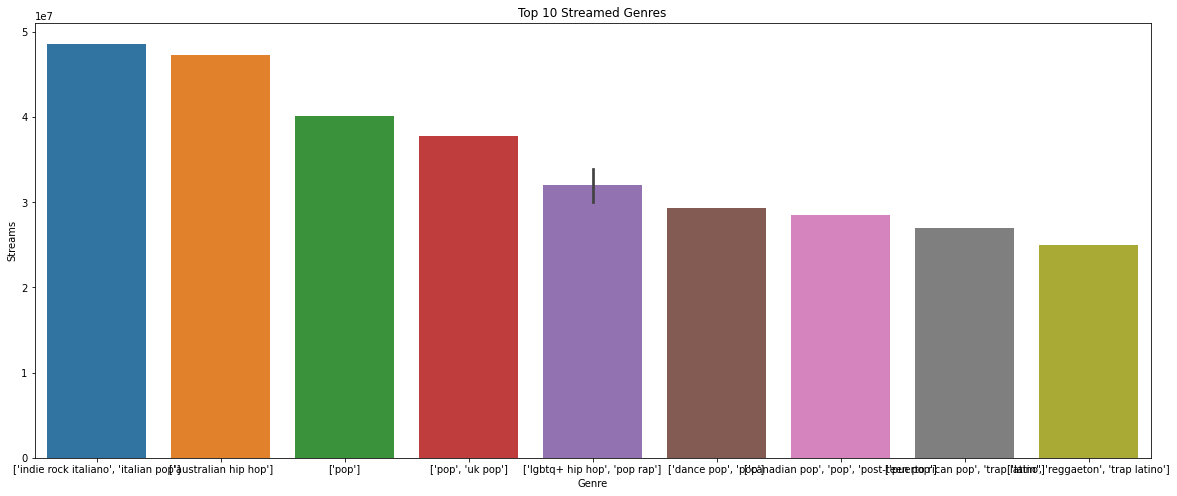

In [ ]:
sort_streams=cdataset.sort_values(by=['Streams'],ascending=False)
plt.figure(figsize=(20,8))
plt.title("Top 10 Streamed Genres")
sns.barplot(x='Genre',y='Streams',data=sort_streams.head(10))

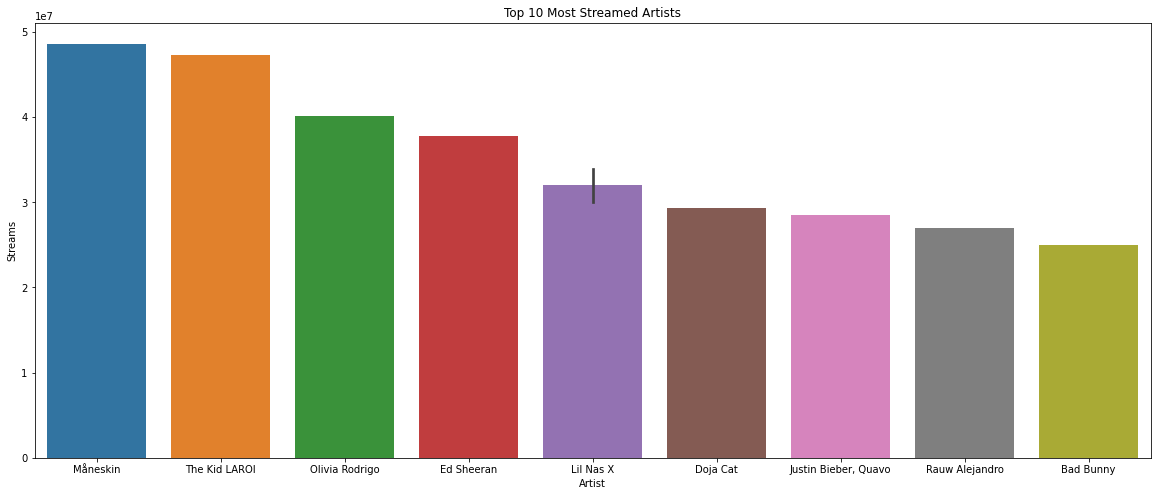

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Top 10 Most Streamed Artists")
sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10))

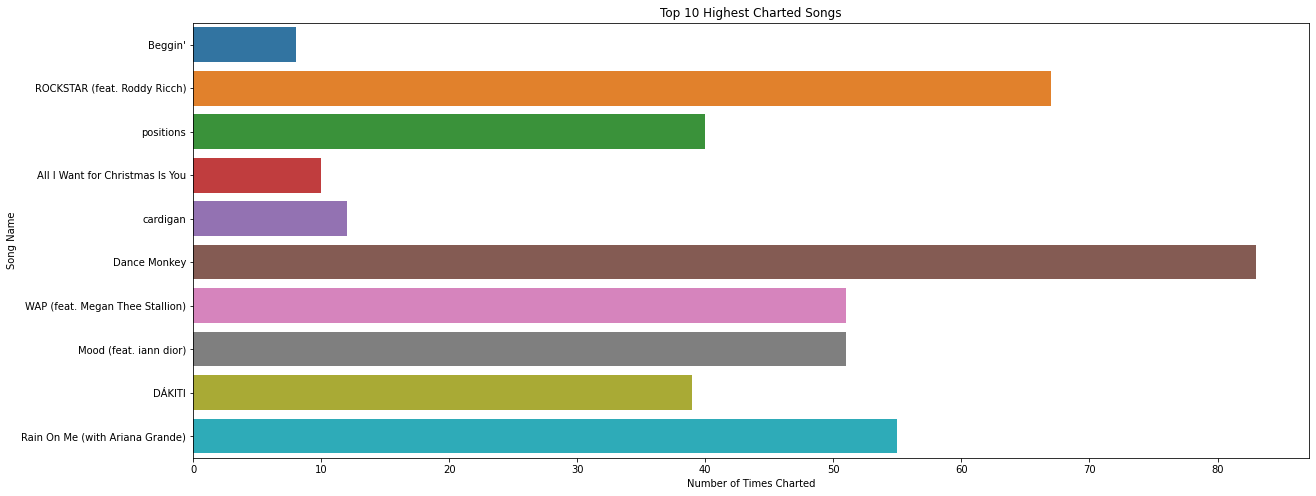

In [ ]:
sort_chart=cdataset.sort_values(by=['Highest Charting Position'],ascending=True)
sort_chart
plt.figure(figsize=(20,8))
plt.title("Top 10 Highest Charted Songs")
sns.barplot(x='Number of Times Charted',y='Song Name',data=sort_chart.head(10))

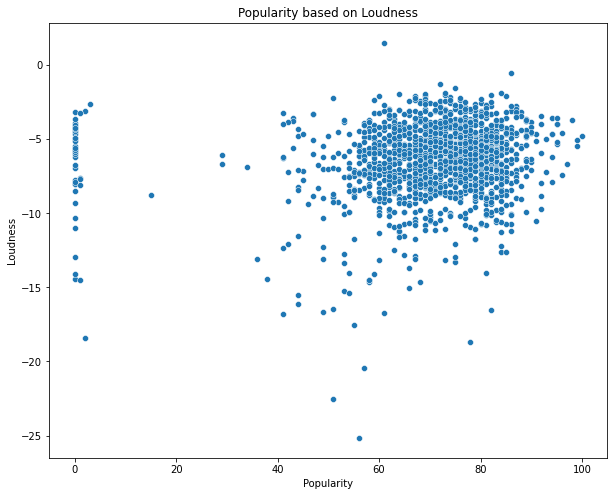

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Popularity based on Loudness")
sns.scatterplot(x='Popularity',y='Loudness',data=cdataset)

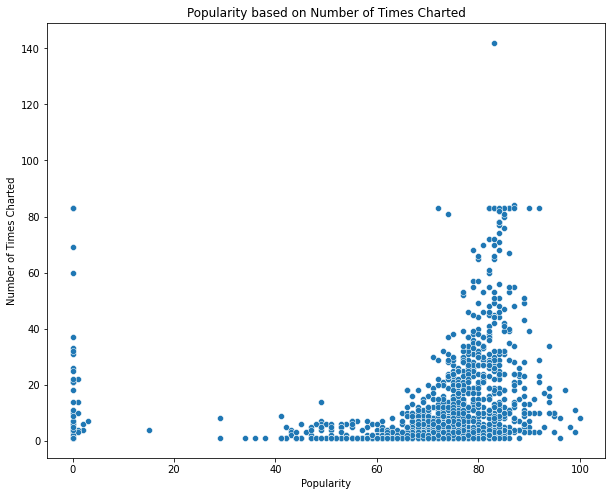

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Popularity based on Number of Times Charted")
sns.scatterplot(x='Popularity',y='Number of Times Charted',data=cdataset)

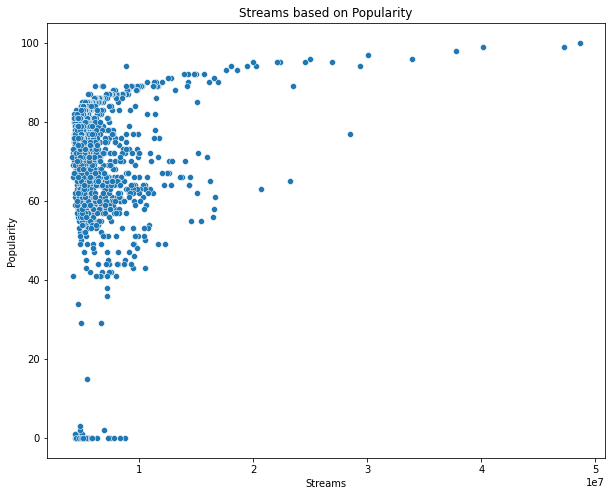

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Streams based on Popularity")
sns.scatterplot(x='Streams',y='Popularity',data=cdataset)

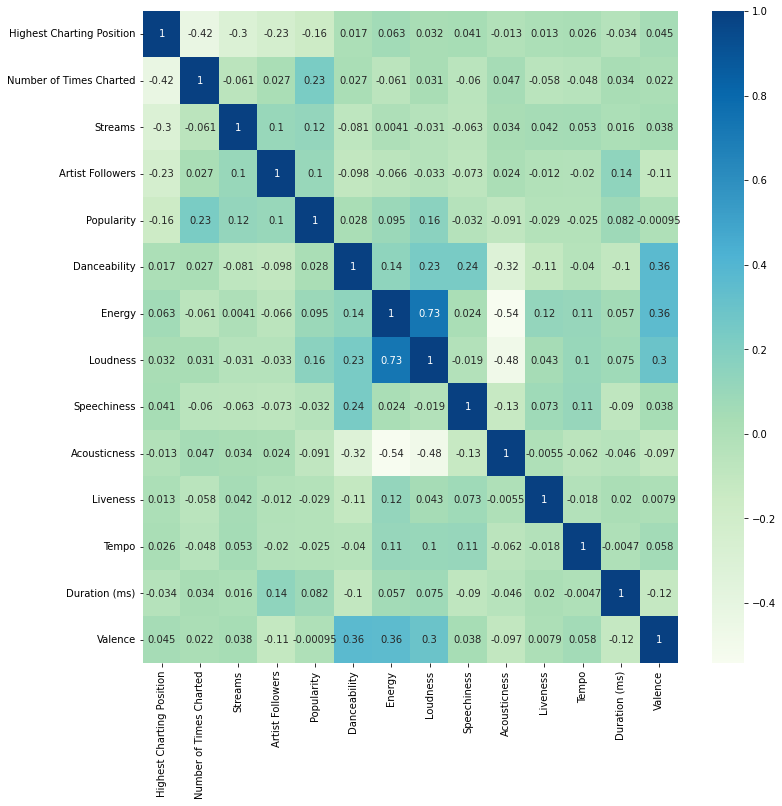

In [ ]:
corr=cdataset.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [ ]:
cleaned_data = cdataset.drop(["Artist", "Song Name", "Release Date"], axis=1)
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762,"['indie rock italiano', 'italian pop']",100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,['australian hip hop'],99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,['pop'],99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,"['pop', 'uk pop']",98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,"['lgbtq+ hip hop', 'pop rap']",96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [ ]:
genre_encoder = LabelEncoder()
cleaned_data['Genre'] = genre_encoder.fit_transform(cleaned_data['Genre'])
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762,276,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,63,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,364,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,363,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,312,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [ ]:
training_data, testing_data = train_test_split(cleaned_data, test_size=0.2, random_state=25)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1236
No. of testing examples: 309


,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1482,73,1,9260007,46814751,187,62,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,200573,0.0495
1228,156,13,4411998,554042,38,77,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,177667,0.8770
1006,169,1,4803071,942380,246,60,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,196933,0.4810
661,22,2,8115520,42227614,360,66,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,229840,0.3480
1422,66,7,6554824,82522,114,70,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,223258,0.6950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,15,3,7880155,14097410,128,76,0.770,0.574,-5.525,0.1060,0.0617,0.1040,98.962,133022,0.1040
730,16,2,8413330,37151476,288,76,0.764,0.526,-7.355,0.2120,0.0484,0.0718,114.910,222243,0.5880
859,116,1,6292620,4849204,111,71,0.616,0.617,-8.431,0.5200,0.1280,0.1770,175.929,177273,0.4760
1085,145,5,4473413,207170,33,79,0.648,0.308,-11.729,0.0400,0.8860,0.1240,76.997,184638,0.1980


In [ ]:
testing_data_stream=testing_data['Streams']
testing_data=testing_data.drop('Streams', axis=1)
testing_data.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1482,73,1,46814751,187,62,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,200573,0.0495
1228,156,13,554042,38,77,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,177667,0.8770
1006,169,1,942380,246,60,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,196933,0.4810
661,22,2,42227614,360,66,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,229840,0.3480
1422,66,7,82522,114,70,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,223258,0.6950


In [ ]:
x_train=training_data.drop('Streams',axis=1)
y_train=training_data['Streams']

x_train.shape, y_train.shape, testing_data.shape

((1236, 14), (1236,), (309, 14))

In [ ]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)
print(l_model.score(x_train,y_train))

l_predict=l_model.predict(testing_data)
l_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':l_predict,'Actual Stream':testing_data_stream})
print(l_output)

0.16261641364117918
        Id  Predicted Streams  Actual Stream
1482  1482       6.046979e+06        9260007
1228  1228       5.377598e+06        4411998
1006  1006       4.066406e+06        4803071
661    661       8.725247e+06        8115520
1422  1422       7.208658e+06        6554824
...    ...                ...            ...
336    336       7.429517e+06        7880155
730    730       8.495627e+06        8413330
859    859       6.003380e+06        6292620
1085  1085       5.412926e+06        4473413
236    236       7.376192e+06        5912293

[309 rows x 3 columns]


In [ ]:
r_model=RandomForestRegressor(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_train,y_train))

r_predict=r_model.predict(testing_data)

r_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':r_predict,'Actual Stream':testing_data_stream})
print(r_output)

0.9742003557648526
        Id  Predicted Streams  Actual Stream
1482  1482         8698910.64        9260007
1228  1228         5056001.44        4411998
1006  1006         5226358.22        4803071
661    661         7079095.30        8115520
1422  1422         4878808.16        6554824
...    ...                ...            ...
336    336         5810086.44        7880155
730    730         5846221.42        8413330
859    859         6290799.04        6292620
1085  1085         5015511.02        4473413
236    236         5301720.86        5912293

[309 rows x 3 columns]
